In [67]:
#install.packages("cluster")
library(datasets)
library(ggplot2)
library(cluster)
data(iris)
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

In [10]:
iris.pcal <- prcomp(iris[1:4], scale=T)
iris.pcal
summary(iris.pcal)

Standard deviations (1, .., p=4):
[1] 1.7083611 0.9560494 0.3830886 0.1439265

Rotation (n x k) = (4 x 4):
                    PC1         PC2        PC3        PC4
Sepal.Length  0.5210659 -0.37741762  0.7195664  0.2612863
Sepal.Width  -0.2693474 -0.92329566 -0.2443818 -0.1235096
Petal.Length  0.5804131 -0.02449161 -0.1421264 -0.8014492
Petal.Width   0.5648565 -0.06694199 -0.6342727  0.5235971

Importance of components%s:
                          PC1    PC2     PC3     PC4
Standard deviation     1.7084 0.9560 0.38309 0.14393
Proportion of Variance 0.7296 0.2285 0.03669 0.00518
Cumulative Proportion  0.7296 0.9581 0.99482 1.00000

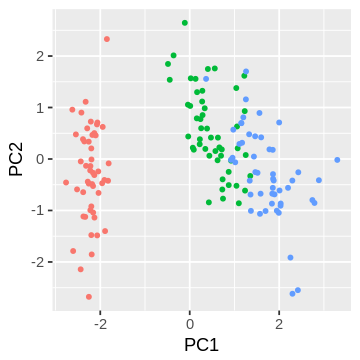

In [24]:
pred <- as.data.frame(predict(iris.pcal, iris))

options(repr.plot.width=3, repr.plot.height=3)
p <- ggplot(pred, aes(x = PC1, y = PC2, color = iris$Species))
p <- p + theme(legend.position="none")
p + geom_point(size=1)

K-means clustering with 3 clusters of sizes 50, 47, 53

Cluster means:
         PC1        PC2
1 -2.2173249 -0.2879627
2  1.7152903 -0.6008742
3  0.5707095  0.8045137

Clustering vector:
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 3 3 3 2 3 3 3 3 3 3 3 3 2 3 3 3 3 2 3 3 3
 [75] 3 2 2 2 3 3 3 3 3 3 3 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 2 2 2 2 3 2 2 2 2
[112] 2 2 3 3 2 2 2 2 3 2 3 2 3 2 2 3 2 2 2 2 2 2 3 3 2 2 2 3 2 2 2 3 2 2 2 3 2
[149] 2 3

Within cluster sum of squares by cluster:
[1] 44.58037 34.82154 34.85204
 (between_SS / total_SS =  80.0 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

   
    setosa versicolor virginica
  1     50          0         0
  2      0         11        36
  3      0         39        14

ERROR: Error in eval(expr, envir, enclos): object 'silhuete' not found


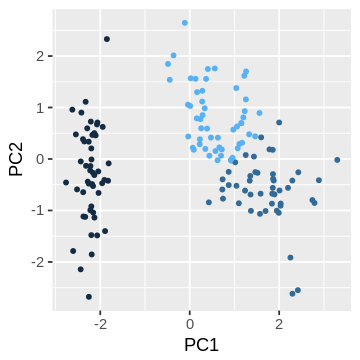

In [68]:
kgroups <- kmeans(pred[1:2], 3, nstart = 100)
kgroups

table(kgroups$cluster, iris$Species)

options(repr.plot.width=3, repr.plot.height=3)
p <- ggplot(pred, aes(x = PC1, y = PC2, color = kgroups$cluster))
p <- p + theme(legend.position="none")
p + geom_point(size=1)

In [72]:
silhouette(kgroups$cluster, pred[1:2])

Warning message in as.dist.default(dist):
“non-square matrix”

       cluster neighbor      sil_width
  [1,]       1        3   4.883784e+00
  [2,]       1        2   7.666822e-01
  [3,]       1        2   1.044018e+00
  [4,]       1        2  -1.704074e+01
  [5,]       1        2  -8.660124e+00
  [6,]       1        2  -1.000000e+00
  [7,]       1        3            NaN
  [8,]       1        3            Inf
  [9,]       1        3            Inf
 [10,]       1        3            Inf
 [11,]       1        3            Inf
 [12,]       1        3  -1.000000e+00
 [13,]       1        3  -1.000000e+00
 [14,]       1        3            Inf
 [15,]       1        3            Inf
 [16,]       1        3  -1.000000e+00
 [17,]       1        3            NaN
 [18,]       1        3            Inf
 [19,]       1        3            Inf
 [20,]       1        3  -1.000000e+00
 [21,]       1        3            Inf
 [22,]       1        3            Inf
 [23,]       1        3  8.801257e+307
 [24,]       1        3  -1.000000e+00
 [25,]       1        3  